In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [3]:
%pylab inline
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

Populating the interactive namespace from numpy and matplotlib


In [33]:
data = pd.read_csv('Critical_KMONs/2017-1-11-17-18-23_DET7AKMON_PodA_CHA_KMON_Step0_spectra_A.csv')
data

,Name,Run Time,200.0,200.5,201.0,201.5,202.0,202.5,203.0,203.5,...,795.5,796.0,796.5,797.0,797.5,798.0,798.5,799.0,799.5,800.0
0,A,2.0,753,742,733,724,714,709,705,704,...,869,824,901,1280,1552,1414,952,872,1080,1081
1,A,4.0,957,926,898,870,846,829,816,806,...,1215,1110,1288,2261,2954,2596,1424,1228,1758,1747
2,A,6.0,1065,1024,985,945,912,887,872,858,...,1216,1110,1290,2223,2890,2548,1420,1227,1733,1718
3,A,8.0,1066,1022,984,947,914,886,873,861,...,1205,1103,1279,2175,2814,2485,1401,1212,1700,1693
4,A,10.0,1068,1025,985,947,913,889,868,857,...,1194,1094,1264,2140,2768,2449,1390,1203,1680,1671
5,A,12.0,1071,1027,985,942,912,889,872,861,...,1191,1093,1258,2128,2749,2431,1382,1197,1666,1656
6,A,14.0,1071,1026,984,947,912,888,872,861,...,1188,1090,1259,2113,2720,2407,1378,1194,1656,1646
7,A,16.0,1068,1027,986,947,913,889,870,857,...,1180,1090,1253,2094,2701,2396,1376,1194,1652,1641
8,A,18.0,1075,1030,984,944,919,889,876,863,...,1182,1084,1247,2085,2688,2384,1368,1187,1640,1633
9,A,20.0,1076,1032,989,949,912,888,873,861,...,1179,1088,1251,2080,2673,2368,1362,1189,1638,1627


In [34]:
data.shape

(362, 1203)

In [35]:
data_df = data.drop('Name', 1)
data_df = data_df.set_index('Run Time')
data_df.head()

,200.0,200.5,201.0,201.5,202.0,202.5,203.0,203.5,204.0,204.5,...,795.5,796.0,796.5,797.0,797.5,798.0,798.5,799.0,799.5,800.0
Run Time,,,,,,,,,,,,,,,,,,,,,
2.0,753,742,733,724,714,709,705,704,702,698,...,869,824,901,1280,1552,1414,952,872,1080,1081
4.0,957,926,898,870,846,829,816,806,801,794,...,1215,1110,1288,2261,2954,2596,1424,1228,1758,1747
6.0,1065,1024,985,945,912,887,872,858,848,841,...,1216,1110,1290,2223,2890,2548,1420,1227,1733,1718
8.0,1066,1022,984,947,914,886,873,861,852,843,...,1205,1103,1279,2175,2814,2485,1401,1212,1700,1693
10.0,1068,1025,985,947,913,889,868,857,850,842,...,1194,1094,1264,2140,2768,2449,1390,1203,1680,1671


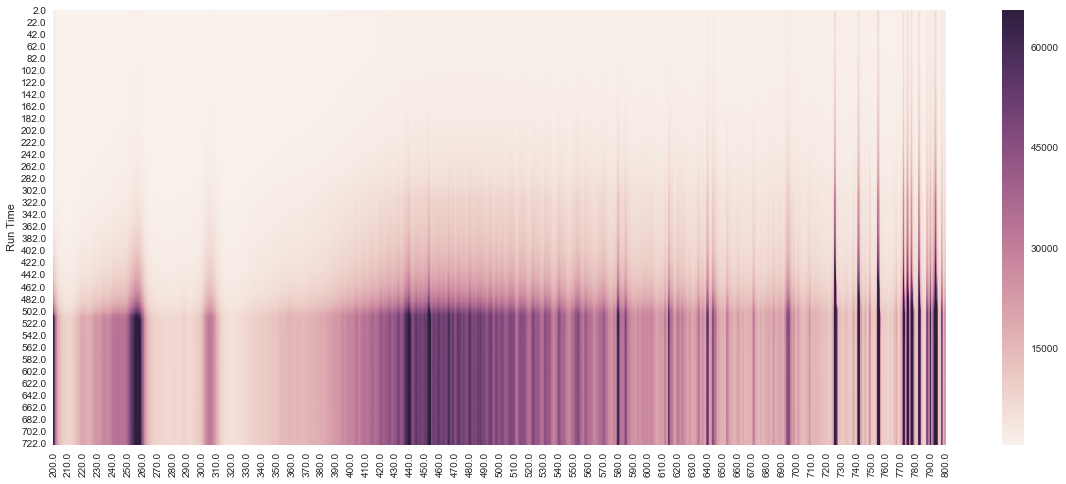

In [36]:
sns.set_palette("deep", desat=0.6)
sns.set_context(rc={"figure.figsize": (20,8)})
ax = sns.heatmap(data_df, xticklabels = 20, yticklabels = 10)
